# Analysis of food_consumption database

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 



Loaded dataset to a DataFrame named `food` and checked its contents.

In [2]:
food = pd.read_csv('data/food_consumption.csv')

In [3]:
food.head(10)

country food_category  consumption  co2_emission
0  Argentina          pork        10.51         37.20
1  Argentina       poultry        38.66         41.53
2  Argentina          beef        55.48       1712.00
3  Argentina     lamb_goat         1.56         54.63
4  Argentina          fish         4.36          6.96
5  Argentina          eggs        11.39         10.46
6  Argentina         dairy       195.08        277.87
7  Argentina         wheat       103.11         19.66
8  Argentina          rice         8.77         11.22
9  Argentina      soybeans         0.00          0.00

In [4]:
food.food_category.unique()

array(['pork', 'poultry', 'beef', 'lamb_goat', 'fish', 'eggs', 'dairy',
       'wheat', 'rice', 'soybeans', 'nuts'], dtype=object)

1. Used the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable.

In [5]:
food.groupby('food_category')['consumption'].describe().sort_values('50%', ascending=False)

count        mean        std   min      25%      50%       75%  \
food_category                                                                   
dairy          130.0  125.774692  93.327721  3.04  45.7925  110.975  192.7150   
wheat          130.0   71.549538  44.191318  2.74  37.0450   69.420  103.3725   
poultry        130.0   21.219231  14.571980  0.47  10.9100   19.855   29.7475   
fish           130.0   17.287077  19.013508  0.24   6.0250   13.950   21.8525   
rice           130.0   29.375154  37.324471  0.95   4.7200   11.875   43.4425   
pork           130.0   16.123692  15.717646  0.00   2.0900   10.355   28.2275   
eggs           130.0    8.163769   5.032582  0.16   3.9450    8.420   12.3125   
beef           130.0   12.123385   9.654140  0.78   4.9975    8.285   17.9400   
nuts           130.0    4.137231   3.372817  0.18   1.8050    3.495    5.6100   
lamb_goat      130.0    2.600154   3.665252  0.00   0.5600    1.325    3.1025   
soybeans       130.0    0.860538   2.083336  0.00   0.0100    0.075    0.6400   

                  max  
food_category          
dairy          430.76  
wheat          197.50  
poultry         62.50  
fish           179.71  
rice           171.73  
pork            67.11  
eggs            19.15  
beef            55.48  
nuts            23.03  
lamb_goat       21.12  
soybeans        16.95

Dairy has the highest median value and mean value.

2. In a single chart, plotted one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric.

<AxesSubplot: xlabel='co2_emission', ylabel='food_category'>

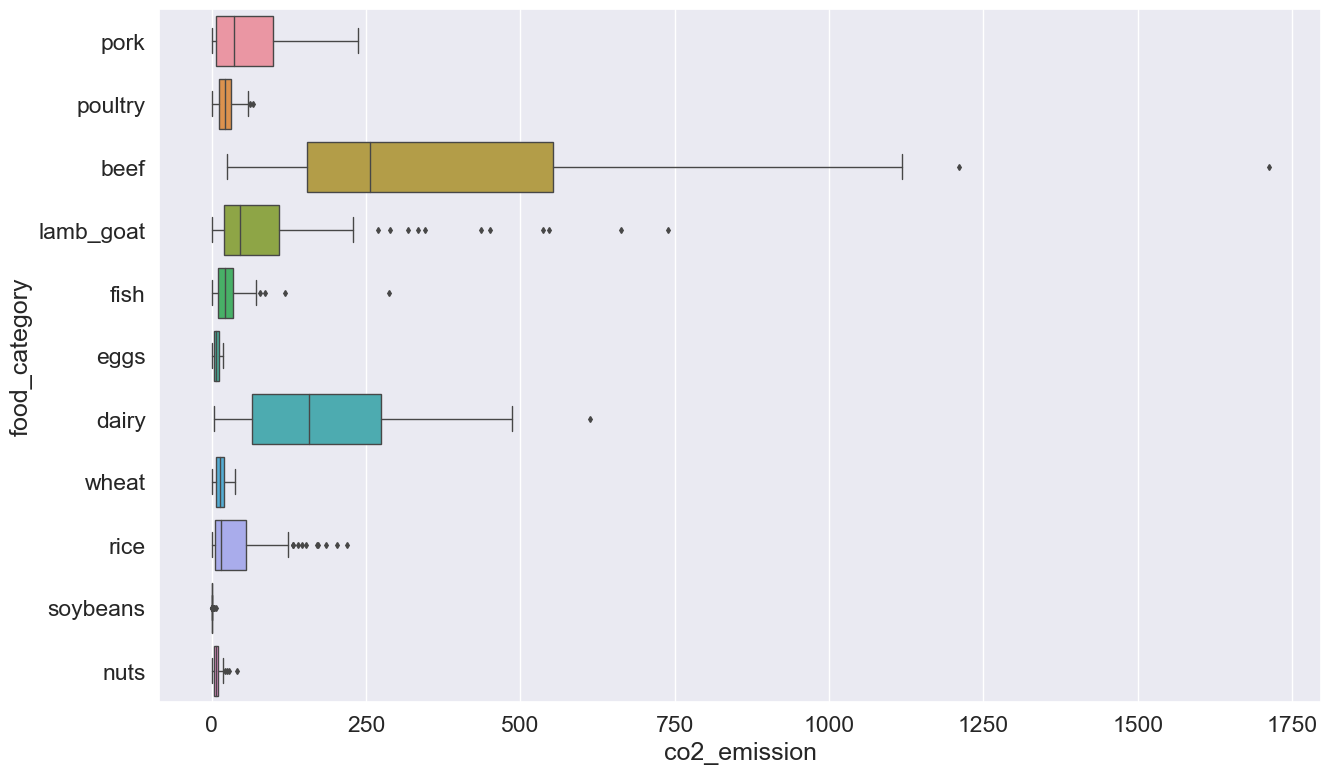

In [6]:
sns.boxplot(x = 'co2_emission', y = 'food_category', data = food, fliersize=3, linewidth=1)

Beef has the highest IQR.

Beef is also the food_category with the highest median co2_emission value.

3. Considering the `consumption` of "poultry" and "fish" across all available `countries`; and looking at the table from point 1, with the average of poultry consumption (21.22) being higher than that of fish consumption (17.29), I checked whether this is difference statistically significant creating a permutation test in order to assess the null hypothesis that there is no difference between the two means.

Null hypothesis (H0): the difference between the poultry consumption mean across countries and the fish consumption mean across countries isn't statistically significant.

Alternative hypothesis (H1): there is a stastistically significant difference between the two means.

I assume H0 is true and try to demonstrate ad absurdum that actually H1 is true.

I select an alpha level of 5%, I don't want it to be too stringent but neither do I want to incurr in a type I error.

In [7]:
countries_consumption = food.groupby(['country', 'food_category'], as_index=False)['consumption'].mean()

In [8]:
consumption_poultry_fish = countries_consumption.loc[(countries_consumption['food_category'] == 'poultry') | (countries_consumption['food_category'] == 'fish')]

In [9]:
consumption_poultry_fish

country food_category  consumption
3      Albania          fish         3.85
7      Albania       poultry        13.23
14     Algeria          fish         3.74
18     Algeria       poultry         7.42
25      Angola          fish        15.24
...        ...           ...          ...
1404   Vietnam       poultry        12.36
1411    Zambia          fish         6.20
1415    Zambia       poultry         3.29
1422  Zimbabwe          fish         2.80
1426  Zimbabwe       poultry         4.97

[260 rows x 3 columns]

In [10]:
fish = consumption_poultry_fish[consumption_poultry_fish['food_category'] == 'fish']['consumption'].values.tolist()
poultry = consumption_poultry_fish[consumption_poultry_fish['food_category'] == 'poultry']['consumption'].values.tolist()

In [11]:
mu_poultry = np.mean(poultry)
mu_fish = np.mean(fish)
mu_diff = mu_poultry - mu_fish
print('Observed test statistic:', mu_diff)

Observed test statistic: 3.9321538461538488


In [12]:
df = consumption_poultry_fish.reset_index(drop=True)

In [13]:
n = 500
mu_diff_samples = []
for i in range(n): 

    df_sample1 = df.sample(frac=0.5, replace=False, random_state=i)

    ix2 = set(df.index) - set(df_sample1.index)

    df_sample2 = df.iloc[list(ix2)]

    mu_diff_temp = np.mean(df_sample1['consumption']) - np.mean(df_sample2['consumption'])

    mu_diff_samples.append(mu_diff_temp)

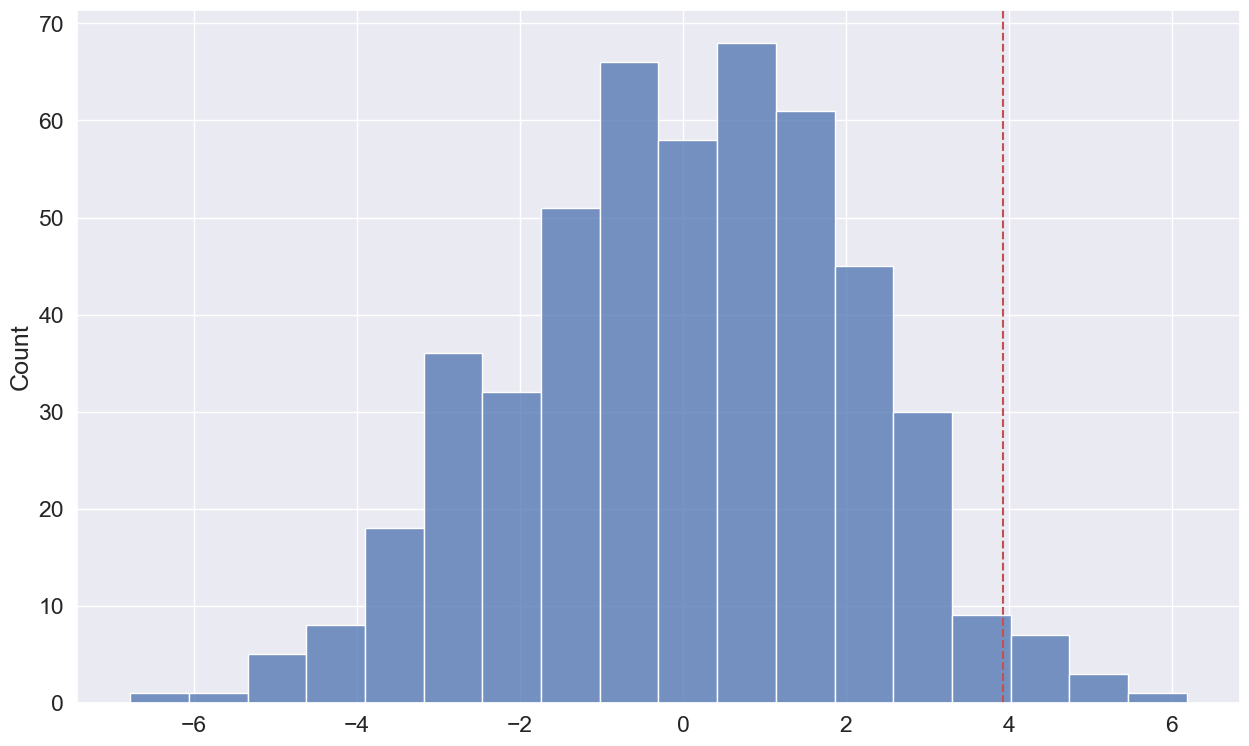

In [14]:
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()

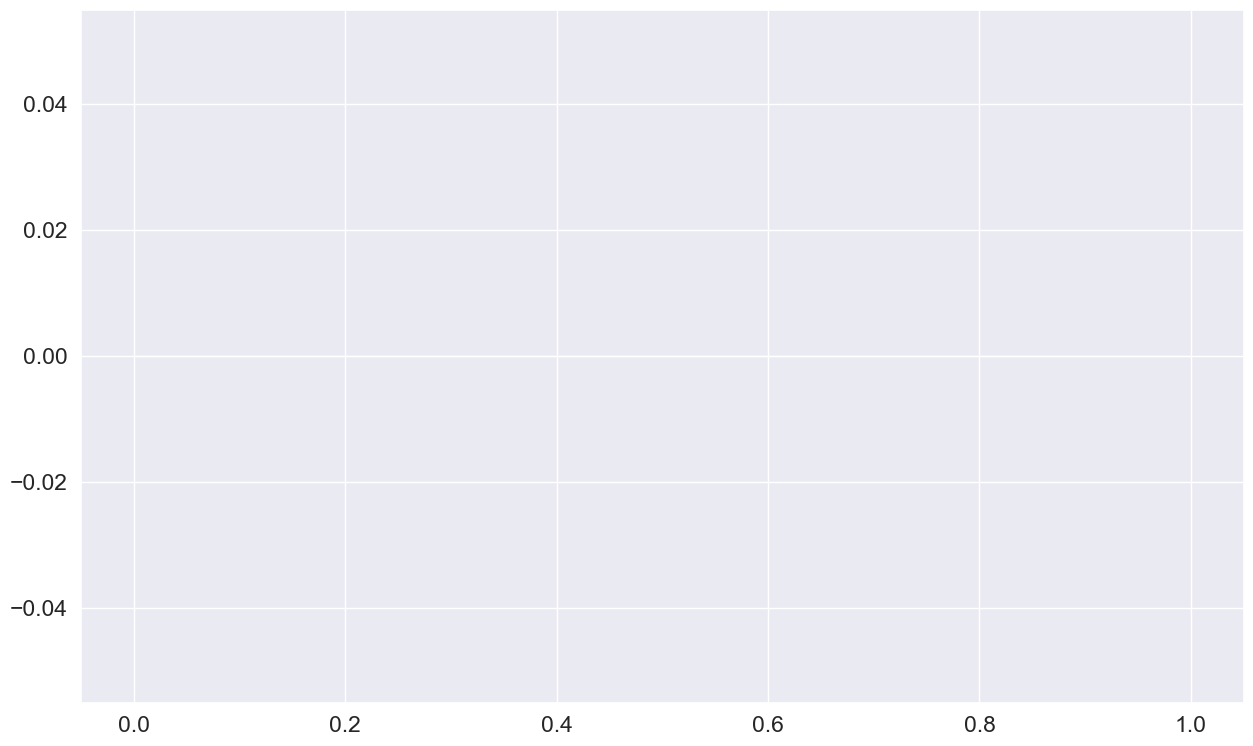

In [15]:
import matplotlib.animation as animation

number_of_frames = 200

def update_hist(num, data):
    plt.cla()
    plt.hist(data[:num])

fig = plt.figure()
hist = plt.hist(mu_diff_samples[0])
animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(mu_diff_samples, ) )

from IPython.display import HTML
HTML(animation.to_jshtml())


In [16]:
print('Average Simulated Test Statistic:', f'{np.mean(mu_diff_samples):.4f}')
print('Initially Observed Test Statistic:', f'{mu_diff:.4f}')

Average Simulated Test Statistic: 0.0073
Initially Observed Test Statistic: 3.9322


The distribution of the simulated test statistic under the null hypothesis is centered on a mean of zero.
What is the possibility of obtaining simulated results at least as extreme as the result actually observed, under the assumption that H0 is correct?

In [17]:
print('Results more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
print('Total results:', len(mu_diff_samples))
p_value = sum([el > mu_diff for el in mu_diff_samples])/n
print('p-value:', sum([el >= mu_diff for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)

Results more extreme than observed: 13
Total results: 500
p-value: 13 / 500 = 0.026


In [18]:
alpha = 0.05
if p_value <= alpha: 
    print('p-value <= alpha | the observed result is statistically significant | H0 rejected')
else: 
    print('p-value > alpha | the observed result is not statistically significant | H0 accepted')

p-value <= alpha | the observed result is statistically significant | H0 rejected


I conclude that the difference between the two means is statistically significant.